<a href="https://colab.research.google.com/github/fucc-it/Ex1.123/blob/master/Version1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
import argparse

In [40]:
class YoloNet:

  def __init__(self, config, weight, labels):
    self.config = config
    self.weight = weight
    self.labels = open(labels).read().strip().split("\n")
    self.COLORS = np.random.uniform(0, 255, size=(len(labels), 3))
    self.cords = []

  def start_net(self):
    self.net = cv2.dnn.readNet(self.weight, self.config)

  def work(self, img):
    self.image = cv2.imread(img)
    Width = self.image.shape[1]
    Height = self.image.shape[0]
    scale = 0.00392
    blob = cv2.dnn.blobFromImage(self.image, scale, (416,416), (0,0,0), True, crop=False)

    self.net.setInput(blob)

    def get_output_layers(net):
      layer_names = net.getLayerNames()
      output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
      return output_layers
    def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
      label = str(self.labels[class_id])
      color = self.COLORS[class_id]
      cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
      cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    outs = self.net.forward(get_output_layers(self.net))
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4
    for out in outs:
      for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        center_x = int(detection[0] * Width)
        center_y = int(detection[1] * Height)
        w = int(detection[2] * Width)
        h = int(detection[3] * Height)
        x = center_x - w / 2
        y = center_y - h / 2
        class_ids.append(class_id)
        confidences.append(float(confidence))
        boxes.append([x, y, w, h])
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    
    for i in indices:
      i = i
      box = boxes[i]
      self.cords.append(box)
      x = box[0]
      y = box[1]
      w = box[2]
      h = box[3]
      draw_bounding_box(self.image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    cv2_imshow(self.image)
    
  def return_cords(self):
    return(self.cords)


In [45]:
class DetectDelta:
  def __init__(self, cords):
    self.cords = cords
    self.cords_array = []
  
  def unpuc_cords(self):
    for i in self.cords:
      self.cords_array.append(i)
    print(self.cords_array)    
  


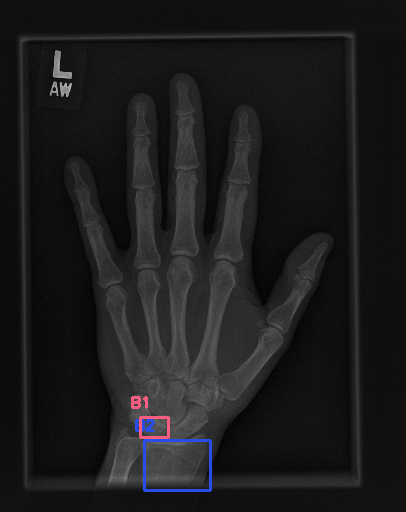

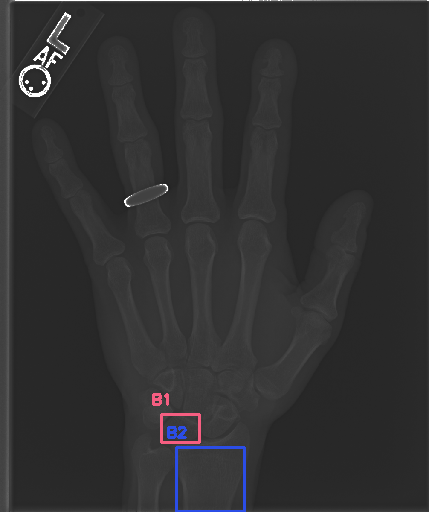

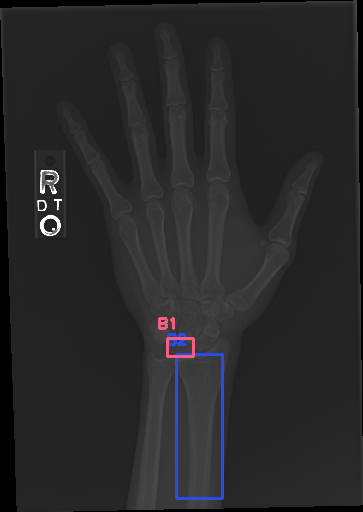

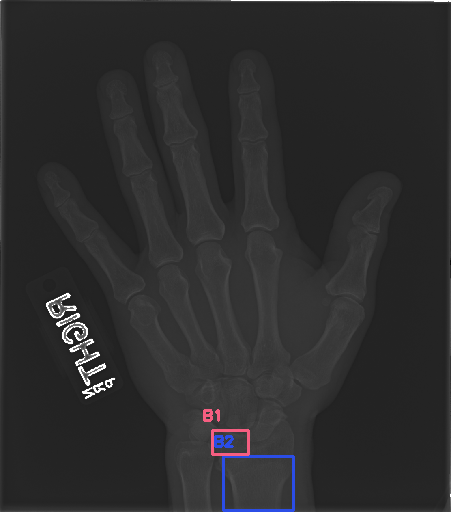

[[143.5, 440.0, 67, 50], [140.5, 417.0, 27, 20], [176.0, 447.0, 68, 64], [161.0, 414.0, 38, 28], [176.5, 354.0, 45, 144], [167.0, 338.5, 26, 17], [223.0, 456.0, 70, 54], [211.5, 430.5, 37, 23]]


In [47]:
config = '/content/drive/MyDrive/YoloV4/yolov4-obj.cfg'
weights ='/content/drive/MyDrive/YoloV4/backup/yolov4-obj_final.weights'
labels = '/content/drive/MyDrive/YoloV4/obj.names'
image = '/content/drive/MyDrive/YoloV4/1.png'


hand = YoloNet(config, weights, labels)
hand.start_net()
hand.work(image)

for i in range(3):
  image = ('/content/drive/MyDrive/YoloV4/valid/'+ str(i+1)+'.png')
  hand.work(image)

delta = DetectDelta(hand.return_cords())
delta.unpuc_cords()